Open the file `Porphyrin absorption.csv` in a text editor and determine its format. Import the data in the notebook using `numpy.loadtxt`. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import my_functions as mf
from scipy.optimize import curve_fit
%matplotlib ipympl
    
data = np.loadtxt('Porphyrin absorption.csv', skiprows = 1,\
                  delimiter=',') 

wavelength = data[:,0]
absorbance = data[:,1]

2) Plot the spectrum, add axes labels and so on.

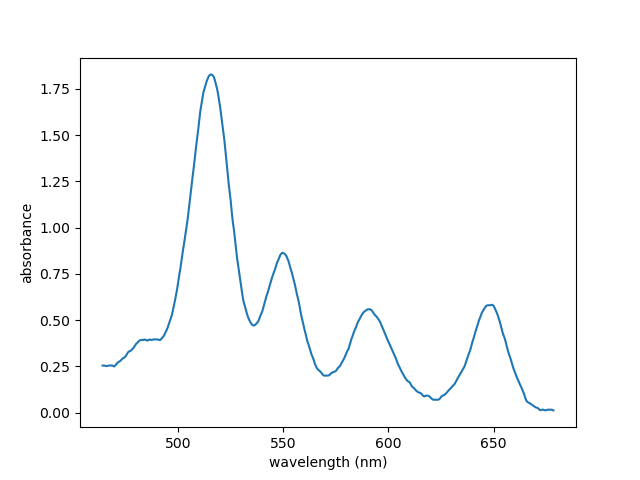

In [8]:
fig,ax = plt.subplots(1,1)
ax.plot(wavelength,absorbance)
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('absorbance')
plt.show()

3) Start by fitting the spectrum with a single Gaussian function centered around the largest peak, and see the result.


[ 47.11369514 515.22151907  10.36533877]


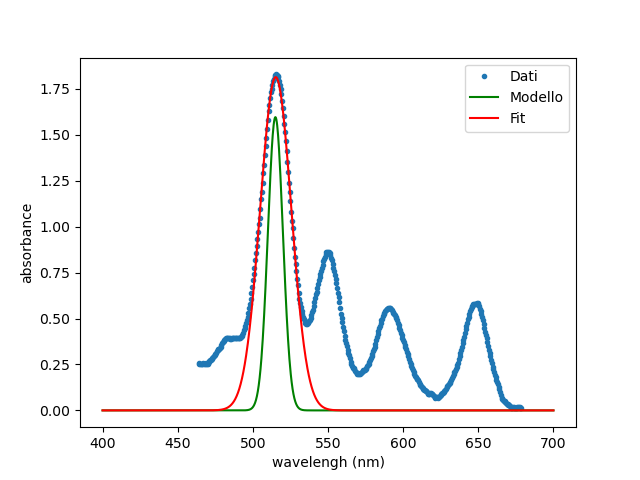

In [9]:
model = mf.Gauss

x = np.linspace(400,700,1000)
p0 = [20,515,5]
iMin = 74
iMax = 134
popt, pcov = curve_fit(model, wavelength[iMin:iMax], absorbance[iMin:iMax], p0)

fitted_curve = model(x,*popt)
print(popt)

fig, ax = plt.subplots()
ax.plot(wavelength,absorbance,'.',label='Dati')
ax.plot(x, model(x,*p0),'g-',label='Modello')
ax.plot(x, fitted_curve, 'r-',label='Fit')
ax.set_xlabel('wavelengh (nm)')
ax.set_ylabel('absorbance')
ax.legend()
# ax[0].axvline(x=500)
plt.show()


4) Determine by eye the number of Gaussians which are required to fit all the peaks. Prepare a fitting function providing such Gaussians (with variable amplitude, center and width) and try to fit the data. 

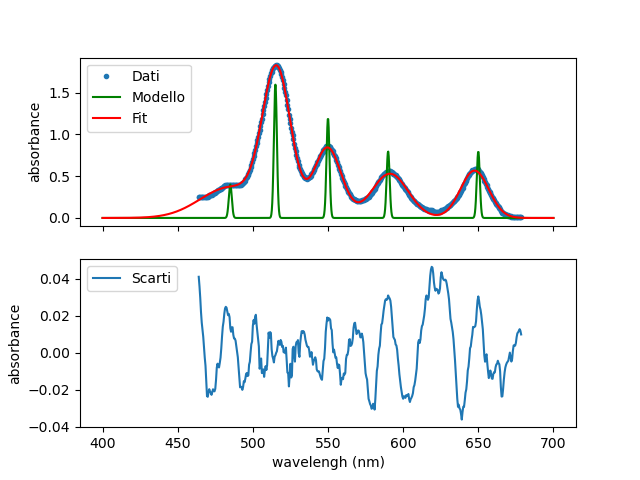

In [10]:
model = mf.Gauss

p0 = [1,4,3,2,2,485,515,550,590,650,1,1,1,1,1] #senza baseline lineare

popt, pcov = curve_fit(model,wavelength,absorbance,p0)

fitted_curve = model(x,*popt)
fitted_curve_discrete = model(wavelength, *popt)
scarti = absorbance-fitted_curve_discrete

fig, ax = plt.subplots(nrows=2,sharex='all')

ax[0].plot(wavelength,absorbance,'.',label='Dati')
ax[0].plot(x, model(x,*p0),'g-',label='Modello')
ax[0].plot(x, fitted_curve, 'r-',label='Fit')
ax[0].set_ylabel('absorbance')
ax[1].set_ylabel('absorbance')
ax[1].plot(wavelength, scarti,'-',label='Scarti',markersize=3)
ax[1].set_xlabel('wavelengh (nm)')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

5) Have a look at the residuals. Add a linear baseline to the sum of Gaussians.

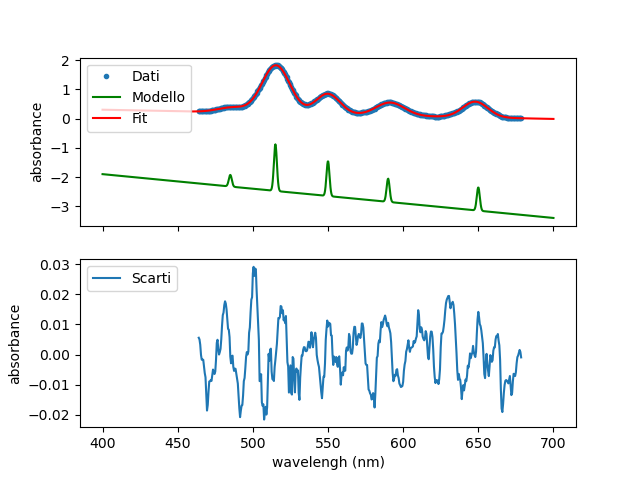

In [11]:
model = mf.GaussPlusBaseline

p0 = [1,4,3,2,2,485,515,550,590,650,1,1,1,1,1,0.1,-0.005] #con baseline lineare

popt, pcov = curve_fit(model,wavelength,absorbance,p0)

fitted_curve = model(x,*popt)
fitted_curve_discrete = model(wavelength, *popt)
scarti = absorbance-fitted_curve_discrete

fig, ax = plt.subplots(nrows=2,sharex='all')

ax[0].plot(wavelength,absorbance,'.',label='Dati')
ax[0].plot(x, model(x,*p0),'g-',label='Modello')
ax[0].plot(x, fitted_curve, 'r-',label='Fit')
ax[0].set_ylabel('absorbance')
ax[1].set_ylabel('absorbance')
ax[1].plot(wavelength, scarti,'-',label='Scarti',markersize=3)
ax[1].set_xlabel('wavelengh (nm)')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

# con la baseline lineare gli scarti sono diminuiti leggermente e il fit anche a occhio risulta migliore 